## Importing necessary libraries and reading 

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_sas('/home/arun/HPCC-covid19/LLCP/LLCP2020.XPT')
df.shape

(401958, 279)

In [3]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_RFPSA23,_CLNSCPY,_SGMSCPY,_SGMS10Y,_RFBLDS4,_STOLDNA,_VIRCOLN,_SBONTIM,_CRCREC1,_AIDTST4
0,1.0,1.0,b'01042020',b'01',b'04',b'2020',1100.0,b'2020000001',2.020000e+09,1.0,...,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0
1,1.0,1.0,b'02072020',b'02',b'07',b'2020',1200.0,b'2020000002',2.020000e+09,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
2,1.0,1.0,b'01232020',b'01',b'23',b'2020',1100.0,b'2020000003',2.020000e+09,1.0,...,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0
3,1.0,1.0,b'01092020',b'01',b'09',b'2020',1100.0,b'2020000004',2.020000e+09,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,1.0,1.0,b'01042020',b'01',b'04',b'2020',1100.0,b'2020000005',2.020000e+09,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0


In [4]:
# check for null values of each column and print the count
dfna1 = df.dropna(axis=1)
dfna2 = dfna1.dropna(axis=0)
dfna3 = df.dropna(axis=0)

print("original size", df.shape)
print("after removing columns with null values", dfna1.shape)
print("after removing rows and columns with null values", dfna2.shape)
print("after removing only rows with null values", dfna3.shape)

# Out of 279, 229 columns have null values.
# it can be seen that each row has one or more null values.

original size (401958, 279)
after removing columns with null values (401958, 50)
after removing rows and columns with null values (401958, 50)
after removing only rows with null values (0, 279)


In [5]:
# columns without any null values
dfna1.columns

# I will not be using dfna1, dfna2, dfna3 for future analysis, as it has removed some important columns.

Index(['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE',
       'SEQNO', '_PSU', 'SEXVAR', 'QSTVER', 'QSTLANG', '_STSTR', '_STRWT',
       '_RAWRAKE', '_WT2RAKE', '_IMPRACE', '_DUALUSE', '_LLCPWT2', '_LLCPWT',
       '_RFHLTH', '_PHYS14D', '_MENT14D', '_HCVU651', '_TOTINDA', '_LTASTH1',
       '_CASTHM1', '_ASTHMS1', '_EXTETH3', '_DENVST3', '_HISPANC', '_SEX',
       '_AGEG5YR', '_AGE65YR', '_AGE80', '_AGE_G', '_RFBMI5', '_CHLDCNT',
       '_EDUCAG', '_INCOMG', '_SMOKER3', '_RFSMOK3', 'DRNKANY5', 'DROCDY3_',
       '_RFBING5', '_DRNKWK1', '_RFDRHV7', '_RFSEAT2', '_RFSEAT3', '_DRNKDRV'],
      dtype='object')

# Choosing variables

In [6]:
# print all the unique values of 'sexvar' column
for i in df['SEXVAR'].unique():
    print(i, type(i))

2.0 <class 'numpy.float64'>
1.0 <class 'numpy.float64'>


In [7]:
cols = list(df.columns)
cols

['_STATE',
 'FMONTH',
 'IDATE',
 'IMONTH',
 'IDAY',
 'IYEAR',
 'DISPCODE',
 'SEQNO',
 '_PSU',
 'CTELENM1',
 'PVTRESD1',
 'COLGHOUS',
 'STATERE1',
 'CELPHONE',
 'LADULT1',
 'COLGSEX',
 'NUMADULT',
 'LANDSEX',
 'NUMMEN',
 'NUMWOMEN',
 'RESPSLCT',
 'SAFETIME',
 'CTELNUM1',
 'CELLFON5',
 'CADULT1',
 'CELLSEX',
 'PVTRESD3',
 'CCLGHOUS',
 'CSTATE1',
 'LANDLINE',
 'HHADULT',
 'SEXVAR',
 'GENHLTH',
 'PHYSHLTH',
 'MENTHLTH',
 'POORHLTH',
 'HLTHPLN1',
 'PERSDOC2',
 'MEDCOST',
 'CHECKUP1',
 'EXERANY2',
 'SLEPTIM1',
 'CVDINFR4',
 'CVDCRHD4',
 'CVDSTRK3',
 'ASTHMA3',
 'ASTHNOW',
 'CHCSCNCR',
 'CHCOCNCR',
 'CHCCOPD2',
 'HAVARTH4',
 'ADDEPEV3',
 'CHCKDNY2',
 'DIABETE4',
 'DIABAGE3',
 'LASTDEN4',
 'RMVTETH4',
 'MARITAL',
 'EDUCA',
 'RENTHOM1',
 'NUMHHOL3',
 'NUMPHON3',
 'CPDEMO1B',
 'VETERAN3',
 'EMPLOY1',
 'CHILDREN',
 'INCOME2',
 'PREGNANT',
 'WEIGHT2',
 'HEIGHT3',
 'DEAF',
 'BLIND',
 'DECIDE',
 'DIFFWALK',
 'DIFFDRES',
 'DIFFALON',
 'SMOKE100',
 'SMOKDAY2',
 'STOPSMK2',
 'LASTSMK2',
 'USENOW3',
 'A

In [8]:
# To check for the presence of AGE, HEIGHT, and WEIGHT columns in the dataframe
for col in cols:
    if 'AGE' in col or 'WEIGHT' in col or 'HEIGHT' in col:
        print(col)

DIABAGE3
WEIGHT2
HEIGHT3
CNCRAGE
_AGEG5YR
_AGE65YR
_AGE80
_AGE_G


In [9]:
# Reported Gender (1 male, 2 female),Weight in pounds <= 776, Height in inches [36,95], 
#_AGE_G -- 1:18-24, 2:25-34, 3:35-44, 4:45-54, 5:55-64,6:>65
#_AGE80 -- Seems to be actual age
goodVars = ['SEXVAR', 'WEIGHT2','HTIN4', '_AGE_G', '_AGE80']

In [11]:
df2 = df[np.logical_and(df.SEXVAR.isin([1,2]), df.WEIGHT2 < 776)]
df2 = df2[np.logical_and(df2.HTIN4 >= 36, df2.HTIN4 <= 95)]

In [12]:
print(df.shape, df2.shape)

(401958, 279) (360186, 279)


In [76]:
df2 = df2.query('SEXVAR.isin([1,2]) & WEIGHT2 < 776 & HTIN4 >= 36 & HTIN4 <= 95 & _AGE_G >= 1 & _AGE_G <= 6 & GENHLTH >=1 & GENHLTH <= 5 & INCOME2 <= 8 & INCOME2 >= 1 & DROCDY3_ <= 900 & _BMI5 >= 1 & _BMI5 <= 9999')

In [15]:
print(df.shape, df2.shape)

(401958, 279) (360186, 279)


In [77]:
print(df.shape, df2.shape)

(401958, 279) (291806, 279)


# Playground

In [82]:
var = '_SMOKER3'

print(df2[var].describe())
print("\nunique values:",np.sort(list(df2[var].unique())))
print("\nnull values:",df2[var].isna().sum(), df2[var].isnull().sum())
df2[var].value_counts().sort_index()


count    291806.000000
mean          3.355202
std           1.038099
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           9.000000
Name: _SMOKER3, dtype: float64

unique values: [1. 2. 3. 4. 9.]

null values: 0 0


1.0     30480
2.0     11330
3.0     81071
4.0    167522
9.0      1403
Name: _SMOKER3, dtype: int64

In [83]:
dfTemp = pd.DataFrame()
smokerMap = {1:'everyday', 2: 'occassional', 3: 'former', 4: 'never', 9: 'unknown'}

dfTemp['smoker'] = df2['_SMOKER3'].map(smokerMap)
dfTemp['smoker'].value_counts()


never          167522
former          81071
everyday        30480
occassional     11330
unknown          1403
Name: smoker, dtype: int64

In [ ]:
# consider these columns:

# _STATE : state name
# _SEX : gender [1:male. 2:female]
# _TOTINDA : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job [1: yes, 2:no, 9:don't know]
# _ASTHMS1 : asthma status 1:current, 2: former, 3:never 9:don't know
# _AGE80 : age
# _CHLDCNT : children count [1: 0 child, 2 : one child, 3: two children, 4: three children, 5: four children, 6: five or more children, 9: NA]
# EDUCA : Education level [1: No school, 2: elementary{1-8}, 3: high school{9-11}, 4:GED, 5: college, 6:College graduate, 9: NA]
# INCOME2 : annual household income [1: less than $10,000, 2: $10,000-$14,999, 3: $15,000-$19,999, 4: $20,000-$24,999, 5: $25,000--$34,999, 6: $35,000--$49,999, 7: $50,000--$74,999, 8: $75,000 or more, 77: NA, 99: NA, BLANK: NA]
# DROCDY3_ : Drink-occasions-per-day  [0-899, 900- NA] (some outliers - apply filter)
# GENHLTH : General health status [1: excellent, 2: very good, 3: good, 5:fair, 5: poor, 7,9,Blank: NA]
# SLEPTIM1 : average sleep hours per day [1-24: hours, 77,99,Blank: NA]
# MARITAL : marital status [1: married, 2: divorced, 3: widowed, 4: separated, 5: never married, , 6: Unmarried Couple member, 9,Blank: NA]
# EMPLOY1 : employment status 
# _BMI5 : 1-9999, BLANK: NA - use filter to remove nan values.
# _BMI5CAT : 1: underweight, 2: normal, 3: overweight, 4: obese, BLANK: NA
# _SMOKER3 : 1:everyday, 2: occassional, 3: former, 4: never, 9: NA


# some trends to observe

# state vs diabetes
# state vs asthma
# state vs avgAge
# state vs avgWeight
# state vs avgHeight
# state vs avgChildren
# state vs sleepHours
# age vs sleepHours
# avgWeight vs sleepHours
# avgHeight vs sleepHours

# Preparing Dataset

In [88]:
df3 = pd.DataFrame()

healthMap ={1:'excellent',2:'verygood',3:'good',4:'fair',5:'poor'}
ailmentMap = {1:'yes', 2:'no', 3:'unknown', 7:'unknown', 9:'unknown', '': 'no'}
diabetesMap = {1:'yes', 2:'no', 3:'no', 4:'no', 7:'no', 9:'no'}
maritalMap = {1:'married',2:'divorced',3:'widowed',4:'separated',5:'nevermarried', 6:'unmarriedcouple',9:'unknown'}
maritalSummary = {1:'yes',2:'no',3:'no', 4:'yes', 5:'no', 6:'no', 9:'unknown'}
educationMap = {1:'none', 2:'elementary', 3:'somehs', 4:'hs',5:'somecollege',6:'college', 9:'unknown'}
veteranMap = {1:'yes',2:'no', 7:'unknown', 9:'unknown'}
stateMap = {1:'AZ', 2:'AS', 4:'AZ',5:'AK',6:'CA', 8:'CO', 9:'CT',10:'DE',11:'DC',12:'FL',13:'GA',
           15:'HI',16:'ID',17:'IL',18:'IN',19:'IA',20:'KS', 21:'KY',22:'LA',23:'ME', 24:'MD', 25:'MA',26:'MI',
           27:'MN',28:'MS', 29:'MO', 30:'MT', 31:'NE',32:'NV', 33:'NH', 34:'NJ', 35:'NM',36:'NY', 37:'NC',
           38:'ND', 39:'OH',40:'OK',41:'OR', 42:'PA',44:'RI',45:'SC', 46:'SD', 47:'TN', 48:'TX', 49:'UT',
           50:'VT', 51:'VA', 53:'WA', 54:'WV',55:'WI', 56:'WY', 66:'Guam', 72:'PR'}
PhysicalActivityMap = {1:'yes', 2:'no', 9:'unknown'}
ChildCntMap = {1:'0', 2:'1', 3:'2', 4:'3', 5:'4', 6:'5', 9:'NA'}
employmentMap = {1:'employed', 2:'self-employed', 3:'outofwork', 4:'outofwork', 5:'homemaker', 
                6:'student', 7:'retired', 8:'unableToWork', 9:'unknown'}
bmicatMap = {1:'underweight', 2:'normal', 3:'overweight', 4:'obese', '':'unknown'}
smokerMap = {1:'everyday', 2: 'occassional', 3: 'former', 4: 'never', 9: 'unknown'}

df3['age'] = df2['_AGE80']
df3['gender'] = df2['SEXVAR'].map({1:'male',2:'female'})
df3['weight'] = df2['WEIGHT2']
df3['height'] = df2['HTIN4']
df3['ageGroup'] = df2['_AGE_G']
df3['genhealth'] = df2['GENHLTH'].map(healthMap)
df3['asthma_ever'] = df2['ASTHMA3'].map(ailmentMap)
df3['asthma'] = df2['ASTHNOW'].map(ailmentMap)
df3['skincancer'] = df2['CHCSCNCR'].map(ailmentMap)
df3['othercancer'] = df2['CHCOCNCR'].map(ailmentMap)
df3['copd'] = df2['CHCCOPD2'].map(ailmentMap)
df3['arthritis'] = df2['HAVARTH4'].map(ailmentMap)
df3['depression'] = df2['ADDEPEV3'].map(ailmentMap)
df3['kidneydis'] = df2['CHCKDNY2'].map(ailmentMap)
df3['diabetes'] = df2['DIABETE4'].map(diabetesMap)
df3['maritaldetail'] = df2['MARITAL'].map(maritalMap)
df3['married'] = df2['MARITAL'].map(maritalSummary)
df3['education'] = df2['EDUCA'].map(educationMap)
df3['veteran'] = df2['VETERAN3'].map(ailmentMap)
df3['income'] = df2['INCOME2']
df3['state'] = df2['_STATE'].map(stateMap)
df3['physicalactivity'] = df2['_TOTINDA'].map(PhysicalActivityMap)
df3['childcnt'] = df2['_CHLDCNT'].map(ChildCntMap)
df3['drinksperday'] = df2['DROCDY3_']
df3['sleephours'] = df2['SLEPTIM1']
df3['employment'] = df2['EMPLOY1'].map(employmentMap)
df3['bmi'] = df2['_BMI5']
df3['bmicategory'] = df2['_BMI5CAT'].map(bmicatMap)
df3['smokertype'] = df2['_SMOKER3'].map(smokerMap)



In [89]:
df3.describe()

,age,weight,height,ageGroup,income,drinksperday,sleephours,bmi
count,291806.000000,291806.000000,291806.000000,291806.000000,291806.00000,2.918060e+05,291806.000000,291806.000000
mean,54.297444,183.413628,67.181998,4.345833,6.10484,1.853107e+01,7.559296,2847.403696
std,17.293244,46.280005,4.168305,1.587413,2.06418,2.925122e+01,6.087741,636.221433
min,18.000000,60.000000,36.000000,1.000000,1.00000,5.397605e-79,1.000000,1202.000000
25%,40.000000,150.000000,64.000000,3.000000,5.00000,5.397605e-79,6.000000,2417.000000
50%,57.000000,180.000000,67.000000,5.000000,7.00000,3.000000e+00,7.000000,2741.000000
75%,68.000000,210.000000,70.000000,6.000000,8.00000,2.700000e+01,8.000000,3162.000000
max,80.000000,630.000000,92.000000,6.000000,8.00000,1.000000e+02,99.000000,9466.000000


In [90]:
df3.columns


Index(['age', 'gender', 'weight', 'height', 'ageGroup', 'genhealth',
       'asthma_ever', 'asthma', 'skincancer', 'othercancer', 'copd',
       'arthritis', 'depression', 'kidneydis', 'diabetes', 'maritaldetail',
       'married', 'education', 'veteran', 'income', 'state',
       'physicalactivity', 'childcnt', 'drinksperday', 'sleephours',
       'employment', 'bmi', 'bmicategory', 'smokertype'],
      dtype='object')

In [94]:
print(df3.shape)
df3.genhealth.describe()


(291806, 29)


count       291806
unique           5
top       verygood
freq        103252
Name: genhealth, dtype: object

In [95]:
df3.to_csv('/home/arun/HPCC-covid19/LLCP/llcpA.csv', index=False)


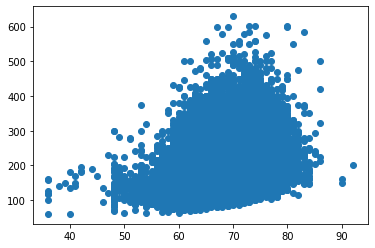

In [96]:
plt.scatter(df3.height, df3.weight)